In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

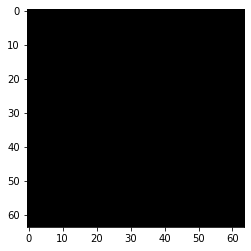

In [16]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (600, 600, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images


In [17]:
from keras.preprocessing.image import ImageDataGenerator
import os


In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 325 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [19]:
# Initialising the CNN
classifier.fit_generator(training_set,
                         steps_per_epoch = 325,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 85)

Epoch 1/2


InvalidArgumentError:  Input to reshape is a tensor with 200704 values, but the requested shape requires a multiple of 700928
	 [[node sequential_2/flatten_2/Reshape (defined at <ipython-input-19-72b593a38cd1>:2) ]] [Op:__inference_train_function_1837]

Function call stack:
train_function
